# Notebook 2: Predicting the house price EDA and data preparation.

## Importing the libraries and first look at the data

In [86]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import date
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from plotnine import *
import pickle
import json

#Libraries for Topic Etraction
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from spacy.lang.nl.stop_words import STOP_WORDS
from spacy.lang.nl import Dutch
from spacy.lang.nl.examples import sentences
#!python -m spacy download nl_core_news_md


In [87]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [88]:
#importing the dataset
funda_df = pd.read_csv('C:\\Users\\shubh\\OneDrive\\Documents\\funda dataset\\funda.csv', sep= ';')

C:\Users\shubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.


In [89]:
#reading the dataset
print("There are {} rows and {} columns in the funda dataset".format(funda_df.shape[0], funda_df.shape[1]))

There are 173043 rows and 73 columns in the funda dataset


In [90]:
#checking for which columns have been imported
funda_df.columns

Index(['url', 'title', 'price', 'postalcode', 'city', 'livingspace',
       'plotarea', 'constructionyear', 'garden', 'energylabel', 'housetype',
       'rooms', 'bathroom', 'description', 'offerdate', 'selldate', 'duration',
       'broker', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unna

#as we can see there are so many unnamed empty columns, so we should drop them to clean the dataset

In [91]:
# dropping the unnamed columns
funda_df.drop(funda_df.columns[funda_df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
funda_df.columns

Index(['url', 'title', 'price', 'postalcode', 'city', 'livingspace',
       'plotarea', 'constructionyear', 'garden', 'energylabel', 'housetype',
       'rooms', 'bathroom', 'description', 'offerdate', 'selldate', 'duration',
       'broker'],
      dtype='object')

In [92]:
#dropping the duplicates
funda_df.drop_duplicates(subset=['url']).shape[0] == funda_df.shape[0]

True

In [93]:
#setting url as index
funda_df = funda_df.set_index("url")
funda_df.head()

,title,price,postalcode,city,livingspace,plotarea,constructionyear,garden,energylabel,housetype,rooms,bathroom,description,offerdate,selldate,duration,broker
url,,,,,,,,,,,,,,,,,
https://www.funda.nl/koop/verkocht/breda/appartement-41316135-cosunpark-1-c6/,Cosunpark 1 C6,470000,4814 ND,Breda,105.0,2.0,2021,Elektra,A,Portiekflat,3,1.0,Licht en luchtig wonen. In het driekamerappart...,10 mei 2021,19 oktober 2021,5 maanden,Van de Water Makelaars
https://www.funda.nl/koop/verkocht/utrecht/huis-42535505-bellamystraat-22/,Bellamystraat 22,1195000,3514 EM,Utrecht,231.0,129.0,1904,Achtertuin,C,Herenhuis,1,2.0,Exclusief Punt! Een prachtig herenhuis (ruim 2...,NaN,NaN,NaN,NaN
https://www.funda.nl/koop/verkocht/koedijk-gem-alkmaar/huis-42524333-de-bregjesakker-25/,De Bregjesakker 25,665000,1831 EP,Koedijk,126.0,473.0,2000,Tuin rondom,B,Eengezinswoning,5,1.0,WONING WORDT VERKOCHT OP INSCHRIJVING. SLUITIN...,NaN,NaN,NaN,NaN
https://www.funda.nl/koop/verkocht/oss/huis-88990064-de-bongerd-2/,De Bongerd 2,325000,5345 JT,Oss,105.0,204.0,1985,Achtertuin en voortuin,B,Eengezinswoning,5,1.0,"Wat een leuke, goed onderhouden twee-onder-een...",23/Nov/21,09/Dec/21,2 weken,Akker Makelaardij
https://www.funda.nl/koop/verkocht/hengelo-ov/huis-42535732-simonstraat-85/,Simonstraat 85,175000,7553 NN,Hengelo,78.0,132.0,1986,Achtertuin en voortuin,C,Eengezinswoning,4,1.0,Starters opgelet: Wij hebben een leuke woning ...,23/Nov/21,08/Dec/21,2 weken,Prisma Era Makelaars Hengelo


In [94]:
#checking the types of the variables
funda_df.dtypes

title                object
price                object
postalcode           object
city                 object
livingspace         float64
plotarea            float64
constructionyear     object
garden               object
energylabel          object
housetype            object
rooms                 int64
bathroom            float64
description          object
offerdate            object
selldate             object
duration             object
broker               object
dtype: object

In [95]:
#describing the dataset
funda_df.describe()

,livingspace,plotarea,rooms,bathroom
count,173043.000000,173043.000000,173043.000000,172969.000000
mean,120.850499,170.690092,4.574614,1.200735
std,52.197982,187.977163,1.475041,0.527072
min,1.026000,1.000000,1.000000,1.000000
25%,89.000000,3.000000,4.000000,1.000000
50%,113.000000,140.000000,5.000000,1.000000
75%,139.000000,242.000000,5.000000,1.000000
max,938.000000,999.000000,9.000000,9.000000


In [96]:
#Min, max and mean of the variables of dataset
print(funda_df.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

               min    max        mean
rooms        1.000    9.0    4.574614
bathroom     1.000    9.0    1.200735
livingspace  1.026  938.0  120.850499
plotarea     1.000  999.0  170.690092


In [97]:
#checking for null values
n_nulls = funda_df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")

There are 92222 rows with null values in this dataset


In [98]:
#checking where all the null values are
funda_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of                                                     title  price  postalcode  \
url                                                                            
https://www.funda.nl/koop/verkocht/breda/appart...  False  False       False   
https://www.funda.nl/koop/verkocht/utrecht/huis...  False  False       False   
https://www.funda.nl/koop/verkocht/koedijk-gem-...  False  False       False   
https://www.funda.nl/koop/verkocht/oss/huis-889...  False  False       False   
https://www.funda.nl/koop/verkocht/hengelo-ov/h...  False  False       False   
...                                                   ...    ...         ...   
https://www.funda.nl/koop/verkocht/enschede/hui...  False  False       False   
https://www.funda.nl/koop/verkocht/weesp/huis-4...  False  False       False   
https://www.funda.nl/koop/verkocht/breda/huis-4...  False  False       False   
https://www.funda.nl/koop/verkocht/zaandam/huis...  False 

## Converting the Datatypes

In [99]:
#Replace NaNs with 0s that are present in the column so that we can convert it into an integer later
funda_df['price'].fillna(0, inplace = True)
funda_df['bathroom'].fillna(0, inplace = True)
funda_df['garden'].fillna(0, inplace = True)

In [100]:
#Drop the string values of the column price to turn in it into an integer
#Since the price column could still not be immediately converted to an integer, we checked for why this is happening and found out that a few rows had "Verkoop bij inschrijving" instead of price
#Check how many entries have this text instead of a price
funda_df.drop(funda_df.loc[funda_df['price']=='Verkoop bij inschrijving'].index, inplace=True)

In [101]:
#Turning constructionyear into an integer by cleaning up the column
funda_df['constructionyear'] =funda_df['constructionyear'].str.replace('Bevoor', '')
funda_df['constructionyear'] =funda_df['constructionyear'].str.replace('Na', '')
funda_df['constructionyear'] =funda_df['constructionyear'].str.replace('Voor', '')
#Only keep the first year mentioned when a range is given (eg. 1991-2000 will only keep 1991)
funda_df['constructionyear'] = funda_df['constructionyear'].str.split('-').str[0]
#converting the columns into the preferred datatypes
funda_df['price'] = funda_df['price'].astype(int)
funda_df['postalcode'] = funda_df['postalcode'].astype('string')
funda_df['city'] = funda_df['city'].astype('string')
funda_df['garden'] = funda_df['garden'].astype('object')
funda_df['livingspace'] = funda_df['livingspace'].astype(int)
funda_df['plotarea'] = funda_df['plotarea'].astype(int)
funda_df['constructionyear'] = funda_df['constructionyear'].astype(int)
funda_df['bathroom'] = funda_df['bathroom'].astype(int)
funda_df['description'] = funda_df['description'].astype('string')
funda_df['broker'] = funda_df['broker'].astype('string')

In [102]:
#Replacing string values in the column garden with a single word. At the same time making a distinguish on which houses have a garden, balcony or no garden at all.
funda_df['garden'] = pd.np.where(funda_df.garden.str.contains("tuin"), "Garden",
    pd.np.where(funda_df.garden.str.contains("balkon"), "Balcony",
    pd.np.where(funda_df.garden.str.contains("Tuin"), "Garden",
    pd.np.where(funda_df.garden.str.contains("0"), " ", " "))))

<ipython-input-102-aab1025f14ec>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-102-aab1025f14ec>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-102-aab1025f14ec>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-102-aab1025f14ec>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [103]:
#making extra column for better analysis
#Make column that returns true if a house has any type of garden
funda_df['garden_bool'] = funda_df['garden'].str.contains('Garden')

In [104]:
#Categorizing the Construction Year Column

constructionyear_categories = []

for year in funda_df['constructionyear']:
    if (year < 1600) :
        constructionyear_categories.append('Before 1600')
    elif (year >=1600 and year < 1700) :
        constructionyear_categories.append('Between 1600-1700')
    elif (year >= 1700 and year < 1800) :
        constructionyear_categories.append('Between 1700-1800')
    elif (year >= 1800 and year < 1900) :
        constructionyear_categories.append('Between 1800-1900')
    elif (year >= 1900 and year < 1950) :
        constructionyear_categories.append('Between 1900-1950')
    elif (year >=1950 and year < 2000) :
        constructionyear_categories.append('Between 1950-2000')
    elif (year >= 2000 and year < 2010) :
        constructionyear_categories.append('Between 2000-2010')
    elif (year >= 2010) :
        constructionyear_categories.append('After 2010')
    else:
        constructionyear_categories.append("ERROR")

funda_df['constructionyear_category'] = constructionyear_categories

(0.0, 1600000.0)

(0.0, 12000.0)

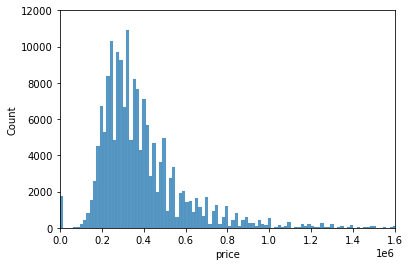

In [105]:
#Distribution of the houseprice
hist = sns.histplot(data = funda_df, x = 'price', bins = 1000)
hist.set_xlim(0, 1600000)
hist.set_ylim(0, 12000)

It can be seen that there some price values at zero as well which means these are outliers so it's better to remove those values in order to get a better outcome.

(0.0, 1600000.0)

(0.0, 12000.0)

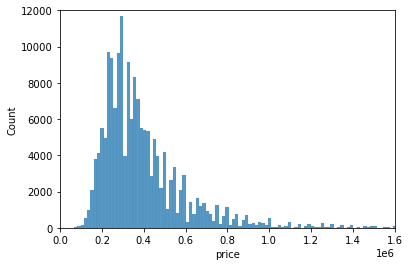

In [106]:
#Removing the outliers by keeping the limit greater than zero
funda_no0price = funda_df[funda_df['price'] > 0]

#Visualizing the new dataset
hist_filtered = sns.histplot(data = funda_no0price, x = 'price', bins = 1000)
hist_filtered.set_xlim(0, 1600000)
hist_filtered.set_ylim(0, 12000)

Now, the distribution looks a lot more realistic. We still want to remove the heavy outliers from this new dataset. For this, we use the Z-Score to understand how far the 
data points are from the mean.
_Z-Score = (data_point - mean) / std.deviation_

In [107]:
#
#Setting Threshold Level
threshold = 3 
#Column that contains z-score based on days till sold 
funda_no0price['z_price'] = np.abs(stats.zscore(funda_no0price['price']))
#Making boolean column to indicate if something is an outlier or not
funda_no0price['outliers'] = abs(funda_no0price['z_price'] > threshold).astype(int)
#Storing a dataset that excludes the outliers
funda_no_outliers = funda_no0price[funda_no0price['outliers'] == 0]

<ipython-input-107-167f6d0a3799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-107-167f6d0a3799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [108]:
#Only including rows in which Livingspace < Plotarea
funda_no_outliers = funda_no_outliers[funda_no_outliers['livingspace'] < funda_no_outliers['plotarea']]

<AxesSubplot:ylabel='url'>

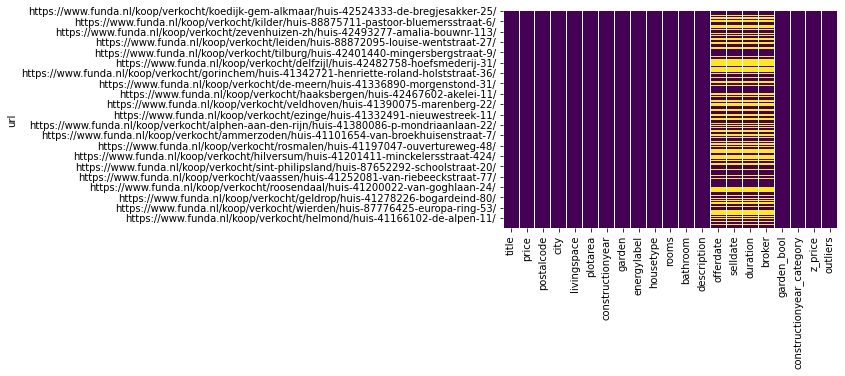

In [109]:
#Visualizing the still missing values
sns.heatmap(funda_no_outliers.isnull(), cbar = False, cmap = 'viridis')

Dropping the rows where we still have mising values

In [110]:
#Dropping missing values
print("With missing values, our dataset has", len(funda_no_outliers), "rows.")
print("By dropping missing values, our dataset will be left with", len(funda_no_outliers.dropna()), "rows.")
#Storing final dataset in funda_final
funda_no_outliers_no_na = funda_no_outliers.dropna()

With missing values, our dataset has 100240 rows.
By dropping missing values, our dataset will be left with 56233 rows.


In [111]:
#Before, cities were removed that only appeared once. Now we removed houses that were sold in 0 days. This removal resulted in again some cities appearing only once. Here, we remove them again
#Count cities again and put into object
final_city_count = funda_no_outliers_no_na['city'].value_counts()
#Select only rows that have cities that appear at least 5 times
funda_no_outliers_no_na_no_double_city = funda_no_outliers_no_na[~funda_no_outliers_no_na['city'].isin(final_city_count[final_city_count < 5].index)]
#Checking that cities appearing < 5 times have been excluded
print(funda_no_outliers_no_na_no_double_city['city'].value_counts())

#The city "Den" seems to be a wrong entry. We remove it
funda_no_den = funda_no_outliers_no_na_no_double_city[funda_no_outliers_no_na_no_double_city.city != "Den"]

print("Removing Den, new counts:")
print(funda_no_den['city'].value_counts())

Den           931
Almere        873
Apeldoorn     786
Tilburg       736
Eindhoven     667
             ... 
Hem             5
Grafhorst       5
Blijham         5
Oostwoud        5
Feanwâlden      5
Name: city, Length: 1201, dtype: Int64
Removing Den, new counts:
Almere        873
Apeldoorn     786
Tilburg       736
Eindhoven     667
Amersfoort    521
             ... 
Tzum            5
Noordhorn       5
Driewegen       5
Blijham         5
Appeltern       5
Name: city, Length: 1200, dtype: Int64


There are no more missing values in our dataset now

In [112]:
#Adding provinces to the dataset
df_cbs = pd.read_csv('C:\\Users\\shubh\\OneDrive\\Documents\\funda dataset\\Gemeenten alfabetisch 2020.csv', sep=';', low_memory=False)
fundadf = df_cbs[['city', 'Provincienaam']].merge(funda_no_den)
fundadf.head()

,city,Provincienaam,title,price,postalcode,livingspace,plotarea,constructionyear,garden,energylabel,...,bathroom,description,offerdate,selldate,duration,broker,garden_bool,constructionyear_category,z_price,outliers
0,Aalsmeer,Noord-Holland,Oosteinderweg 373,335000,1432 AZ,116,195,1930,,E,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,11 oktober 2021,2 maanden,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.266072,0
1,Aalsmeer,Noord-Holland,Kamperfoeliestraat 62,395000,1431 RP,81,175,1995,Garden,C,...,1,Deze “kwadrant” woning heeft niet alleen een l...,02/Sep/21,24/Sep/21,3 weken,Makelaarskantoor Mantel BV,True,Between 1950-2000,0.017797,0
2,Aalsmeer,Noord-Holland,Oosteinderweg 371 a,355000,1432 AZ,134,183,1930,,G,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,09/Sep/21,4 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.183314,0
3,Aalsmeer,Noord-Holland,Oosteinderweg 177,750000,1432 AK,180,825,1930,,F,...,2,Aan de voorzijde ziet u niet hoe netjes en rui...,30 juli 2021,06/Sep/21,5 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,1.451160,0
4,Aalsmeer,Noord-Holland,Oosteinderweg 409,299000,1432 BH,81,132,1925,Garden,G,...,1,"Bieden vanaf € 299.000,- met een originele vra...",10/Sep/21,28 oktober 2021,6 weken,Goedhart Makelaars & Taxateurs,True,Between 1900-1950,0.415037,0


## Now storing the final dataset for analysis

<AxesSubplot:>

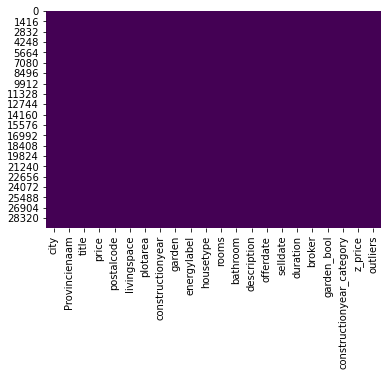

In [113]:
funda_final = fundadf

sns.heatmap(funda_final.isnull(), cbar = False, cmap = 'viridis')

In [114]:
print("Before cleaning the data, our dataset had", len(funda_df), "rows.")
print("After cleaning the data, our dataset contains", len(funda_final), "rows.")

Before cleaning the data, our dataset had 172990 rows.
After cleaning the data, our dataset contains 29717 rows.


# EDA based on sample, focusing on predicting the housing price

In [115]:
funda_final.head()

,city,Provincienaam,title,price,postalcode,livingspace,plotarea,constructionyear,garden,energylabel,...,bathroom,description,offerdate,selldate,duration,broker,garden_bool,constructionyear_category,z_price,outliers
0,Aalsmeer,Noord-Holland,Oosteinderweg 373,335000,1432 AZ,116,195,1930,,E,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,11 oktober 2021,2 maanden,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.266072,0
1,Aalsmeer,Noord-Holland,Kamperfoeliestraat 62,395000,1431 RP,81,175,1995,Garden,C,...,1,Deze “kwadrant” woning heeft niet alleen een l...,02/Sep/21,24/Sep/21,3 weken,Makelaarskantoor Mantel BV,True,Between 1950-2000,0.017797,0
2,Aalsmeer,Noord-Holland,Oosteinderweg 371 a,355000,1432 AZ,134,183,1930,,G,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,09/Sep/21,4 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.183314,0
3,Aalsmeer,Noord-Holland,Oosteinderweg 177,750000,1432 AK,180,825,1930,,F,...,2,Aan de voorzijde ziet u niet hoe netjes en rui...,30 juli 2021,06/Sep/21,5 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,1.451160,0
4,Aalsmeer,Noord-Holland,Oosteinderweg 409,299000,1432 BH,81,132,1925,Garden,G,...,1,"Bieden vanaf € 299.000,- met een originele vra...",10/Sep/21,28 oktober 2021,6 weken,Goedhart Makelaars & Taxateurs,True,Between 1900-1950,0.415037,0


In [116]:
# saving the cleaned data to a csv file to use later for modelling 
funda_final.to_csv('output.csv')

Due to the size of the dataset, a random sample of 1,000 datapoints is explored first. This is to understand if there are variables in particular that should be taken into account when analyzing the full dataset.

In [117]:
#Storing a sample of the final dataset to explore
price_data = funda_final.sample(n = 1000, replace = False, random_state = 1)

#Comparing full dataset to sample data
full_max = math.floor(funda_final['price'].max())
full_min = math.floor(funda_final['price'].min())
full_mean = math.floor(funda_final['price'].mean())
sample_max = math.floor(price_data['price'].max())
sample_min = math.floor(price_data['price'].min())
sample_mean = math.floor(price_data['price'].mean())

print("The full datasaet contained a total amount of", len(funda_final), "houses with a maximum of", full_max, "days, a minimum of", full_min, "days and a mean of", full_mean, "days on Funda.")
print("The sample contains a total amount of", len(price_data), "houses with a maximum of", sample_max, "days, a minimum of", sample_min, "days and a mean of", sample_mean, "days on Funda.")

The full datasaet contained a total amount of 29717 houses with a maximum of 1120000 days, a minimum of 75000 days and a mean of 373014 days on Funda.
The sample contains a total amount of 1000 houses with a maximum of 1100000 days, a minimum of 89000 days and a mean of 382412 days on Funda.


In [118]:
#Conclusions based on the mean
print("Based on our sample of", len(price_data), "houses taken from the dataset, the following findings can be made: \n")
cities = price_data.groupby(['city']).mean().reset_index()
cities = cities.sort_values('price', ascending = True)
#print(cities[['city', 'price']].head(3))
print("       - On average, the houses that were more expensive were in the city", cities['city'].iloc[0])

gardens = price_data.groupby(['garden_bool']).mean().reset_index()
gardens = gardens.sort_values('price', ascending = True)
#print(gardens[['garden_bool', 'price']].head(3))
gardens_true = gardens[gardens['garden_bool'] == True]['price'].iloc[0]
gardens_false = gardens[gardens['garden_bool'] == False]['price'].iloc[0]
gardens_true = gardens_true.astype(int)
gardens_false = gardens_false.astype(int)
if gardens_true < gardens_false:
    print("       - On average, if a house had a garden it was sold on a higher price", (gardens_false - gardens_true), "days faster")
else:
    print("       - On average, if a house had a garden it was sold on a higher price", (gardens_true - gardens_false), "days slower")

livingspaces = price_data.groupby(['livingspace']).mean().reset_index()
livingspaces = livingspaces.sort_values('price', ascending = True)
#print(livingspaces[['livingspace', 'price']].head(3))
print("       - On average, houses were sold on a higher price when they had a size of", livingspaces['livingspace'].iloc[0], "sqm")

rooms = price_data.groupby(['rooms']).mean().reset_index()
rooms = rooms.sort_values('price', ascending = True)
#print(rooms[['rooms', 'price']].head(3))
print("       - On average, houses were sold on a higher price when they had", rooms['rooms'].iloc[0], "rooms")

construction_years = price_data.groupby(['constructionyear']).mean().reset_index()
construction_years = construction_years.sort_values('price', ascending = True)
#print(construction_years[['constructionyear', 'price']].head(3))
print("       - On average, houses were sold on a higher price if they were constructed in", construction_years['constructionyear'].iloc[0])

brokers = price_data.groupby(['broker']).mean().reset_index()
brokers = brokers.sort_values('price', ascending = True)
#print(brokers[['broker', 'price']].head(3))
print("       - On average, houses were sold on a higher price with", brokers['broker'].iloc[0])


Based on our sample of 1000 houses taken from the dataset, the following findings can be made: 

       - On average, the houses that were more expensive were in the city Delfzijl
       - On average, if a house had a garden it was sold on a higher price 10495 days slower
       - On average, houses were sold on a higher price when they had a size of 61 sqm
       - On average, houses were sold on a higher price when they had 2 rooms
       - On average, houses were sold on a higher price if they were constructed in 1908
       - On average, houses were sold on a higher price with Fer Haas Makelaardij


<AxesSubplot:xlabel='price', ylabel='Count'>

Text(0.5, 1.0, '\n Visualizing the Sample')

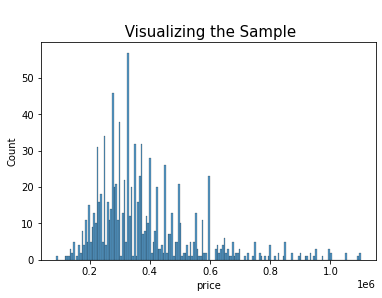

In [119]:
#Visualizing the sample
sns.histplot(data = price_data, x = 'price', bins = 180)
plt.title('\n Visualizing the Sample', fontsize = 15)

Based on the above distribution, it can be observed that most house are sold between 200,000 and 400,000.

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Impact of Livingspace on price on Funda')

Text(0.5, 0, 'Livingspace')

Text(0, 0.5, 'price')

<AxesSubplot:>

Text(0.5, 1.0, 'Impact of Construction Year on price on Funda')

Text(0.5, 0, 'Construction Year')

Text(0, 0.5, '')

<AxesSubplot:>

Text(0.5, 1.0, 'Impact of Number of Rooms on price on Funda')

Text(0.5, 0, 'Number of Rooms')

Text(0, 0.5, 'price')

<AxesSubplot:>

Text(0.5, 1.0, 'Impact of Energy Label on price on Funda')

Text(0.5, 0, 'Energy Label')

Text(0, 0.5, '')

<AxesSubplot:>

Text(0.5, 1.0, 'Impact of Garden on price on Funda')

Text(0.5, 0, 'Garden YES/NO')

Text(0, 0.5, '')

Text(0.5, 0.98, '\n What is the impact of different variables on the days to sell on Funda?')

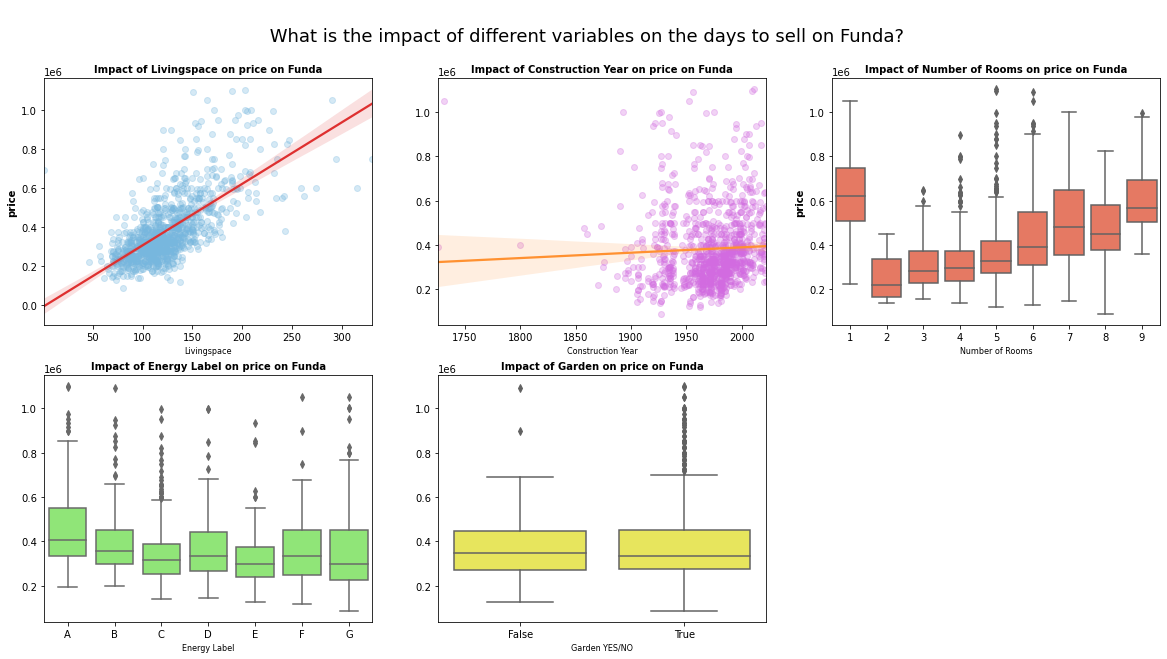

In [120]:
#Impact of different variables on price Visualization
#Specifying Figure Layout
plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plot1 = sns.regplot(data = price_data, x = 'livingspace', y = 'price', color = '#77B7DE', scatter_kws={'alpha':0.3}, line_kws={"color": "#DE3030"})
plot1.set_title("Impact of Livingspace on price on Funda", fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})
plot1.set_xlabel('Livingspace', fontsize = 8)
plot1.set_ylabel('price', fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})

#Creating Plot 2
plt.subplot(2, 3, 2)
plot3 = sns.regplot(data = price_data, x = 'constructionyear', y = 'price', color = '#D26BE0', scatter_kws={'alpha':0.3}, line_kws={"color": "#FF9131"})
plot3.set_title("Impact of Construction Year on price on Funda", fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})
plot3.set_xlabel('Construction Year', fontsize = 8)
plot3.set_ylabel(None)

#Creating Plot 3
plt.subplot(2, 3, 3)
plot4 = sns.boxplot(data = price_data, x = 'rooms', y = 'price', color = '#FB6B4D')
plot4.set_title("Impact of Number of Rooms on price on Funda", fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})
plot4.set_xlabel('Number of Rooms', fontsize = 8)
plot4.set_ylabel('price', fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})

#Creating Plot 4
plt.subplot(2, 3, 4)
plot5 = sns.boxplot(data = price_data, x = 'energylabel', y = 'price', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], color = '#86F766')
plot5.set_title("Impact of Energy Label on price on Funda", fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})
plot5.set_xlabel('Energy Label', fontsize = 8)
plot5.set_ylabel(None)

#Creating Plot 5
plt.subplot(2, 3, 5)
plot6 = sns.boxplot(data = price_data, x = 'garden_bool', y = 'price', color = '#FEFB46')
plot6.set_title("Impact of Garden on price on Funda", fontdict = {'fontsize' : 10, 'fontweight' : 'heavy'})
plot6.set_xlabel('Garden YES/NO', fontsize = 8)
plot6.set_ylabel(None)

plt.suptitle('\n What is the impact of different variables on the price on Funda?', fontsize = 18)

Based on these visualizations, it is clear to see a strong trend. Even though the Regression Line is pointing towards a trend, it does not seem very reliable, as the datapoints seem to be quite clustered together.
Looking at the Boxplots, the medians between the categories of energy label and garden are very close together but number of rooms and living space have an impact on the prices .

<AxesSubplot:xlabel='price', ylabel='Count'>

Text(0.5, 1.0, '\n Visualizing the Sample')

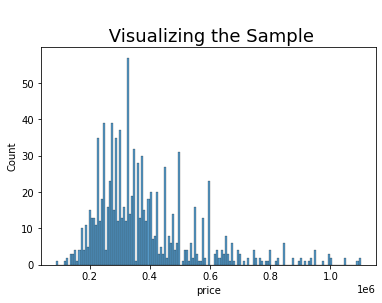

In [121]:
#Visualizing the sample
sns.histplot(data = price_data, x = 'price', bins = 150)
plt.title('\n Visualizing the Sample', fontsize = 18)

As it can be seen that most houses are sold between 200,000 and 400,000

In [122]:
# means of the integers per city
grouped = funda_final.groupby('city').mean()
grouped.sort_values('price', ascending=False)

,price,livingspace,plotarea,constructionyear,rooms,bathroom,garden_bool,z_price,outliers
city,,,,,,,,,
Bloemendaal,777714.285714,133.000000,221.785714,1928.928571,5.428571,1.428571,0.857143,1.565839,0.0
Heemstede,701681.818182,137.254545,256.527273,1943.463636,5.327273,1.254545,0.945455,1.280942,0.0
Blaricum,678019.588235,134.196078,294.647059,1973.156863,5.019608,1.274510,0.941176,1.205531,0.0
Laren,676080.645161,136.612903,363.645161,1954.516129,5.370968,1.306452,0.903226,1.200644,0.0
Wassenaar,668657.627119,142.898305,278.101695,1950.423729,5.610169,1.491525,0.864407,1.144548,0.0
...,...,...,...,...,...,...,...,...,...
Appingedam,232150.000000,120.800000,375.050000,1949.700000,4.800000,1.200000,0.900000,0.691656,0.0
Kerkrade,231208.801843,128.746544,298.645161,1959.377880,5.046083,1.216590,0.815668,0.719729,0.0
Coevorden,229828.358209,115.761194,280.014925,1975.902985,5.328358,1.059701,0.970149,0.710044,0.0


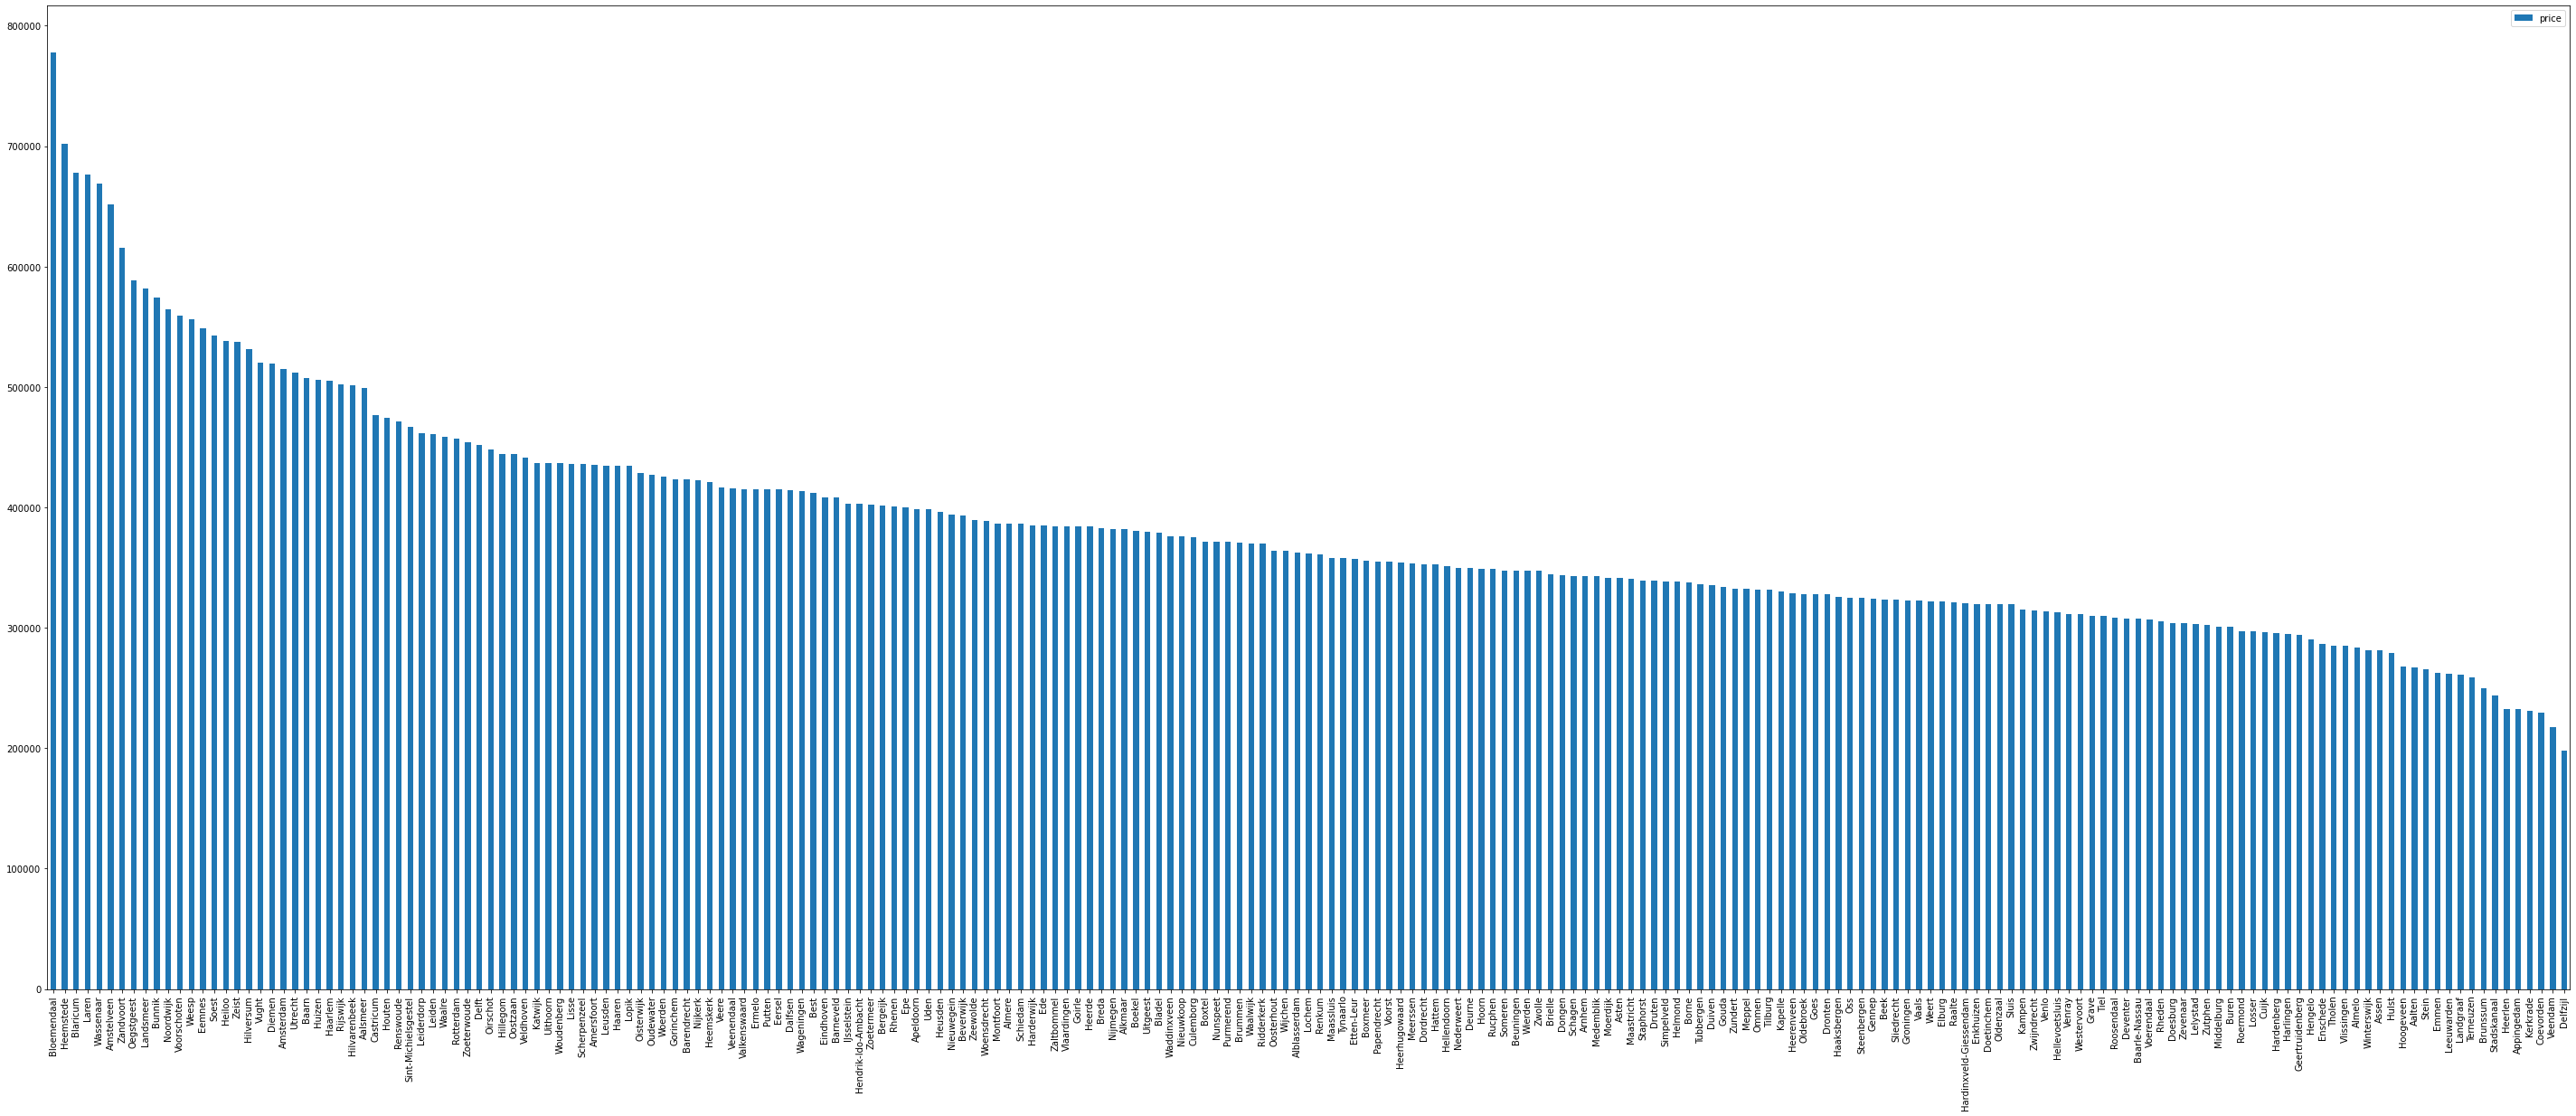

In [123]:
#Average Houseprice per city
fundadf = funda_final.groupby(by="city").agg({'price':'mean'}).reset_index().sort_values(by='price', ascending=False)
ax = fundadf.plot.bar(x='city', xlabel = '', figsize=(50,20))

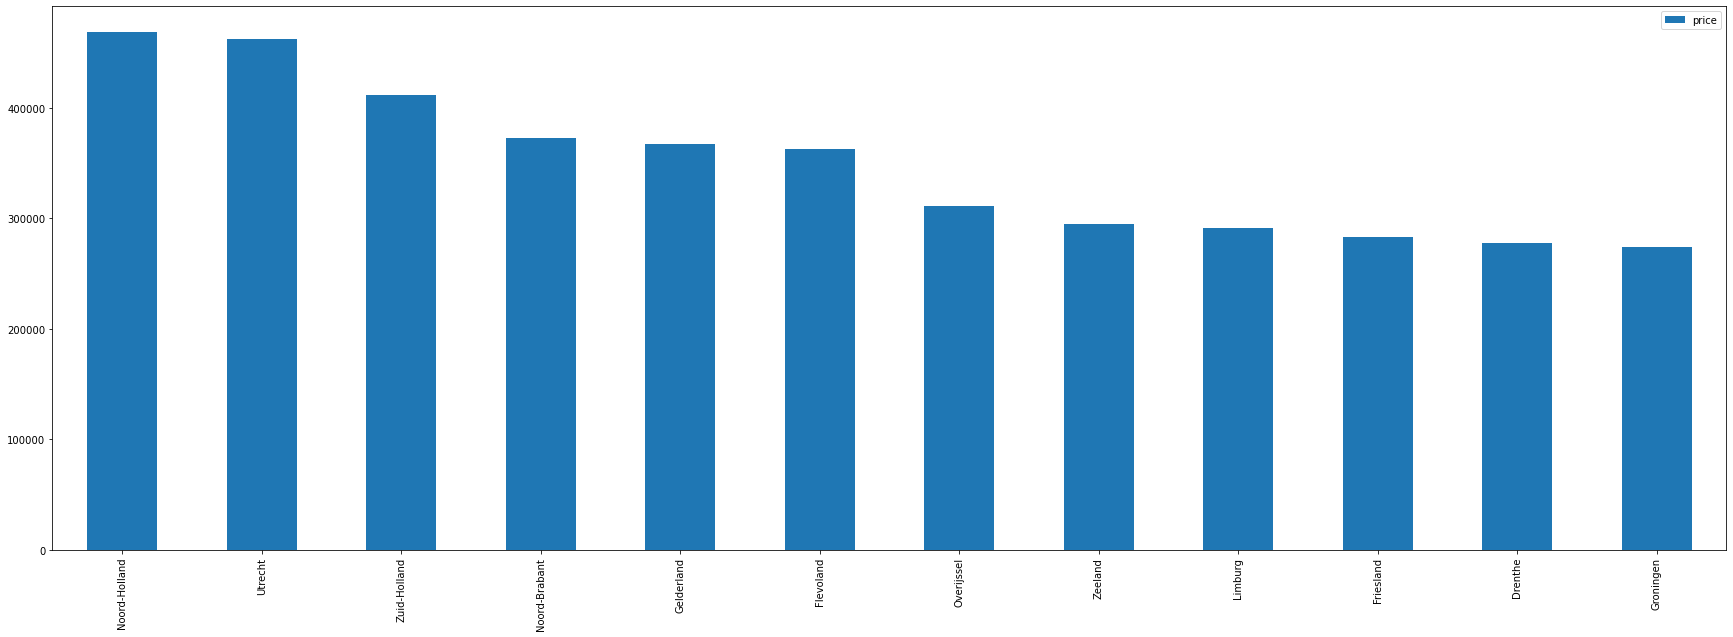

In [124]:
#Average houseprice per province 
fundadf = funda_final.groupby(by="Provincienaam").agg({'price':'mean'}).reset_index().sort_values(by='price', ascending=False)
ax = fundadf.plot.bar(x='Provincienaam', xlabel = '', figsize=(30,10))

Based on the above bar plot, it can be seen that houses are most expensive in the noord Holland province.

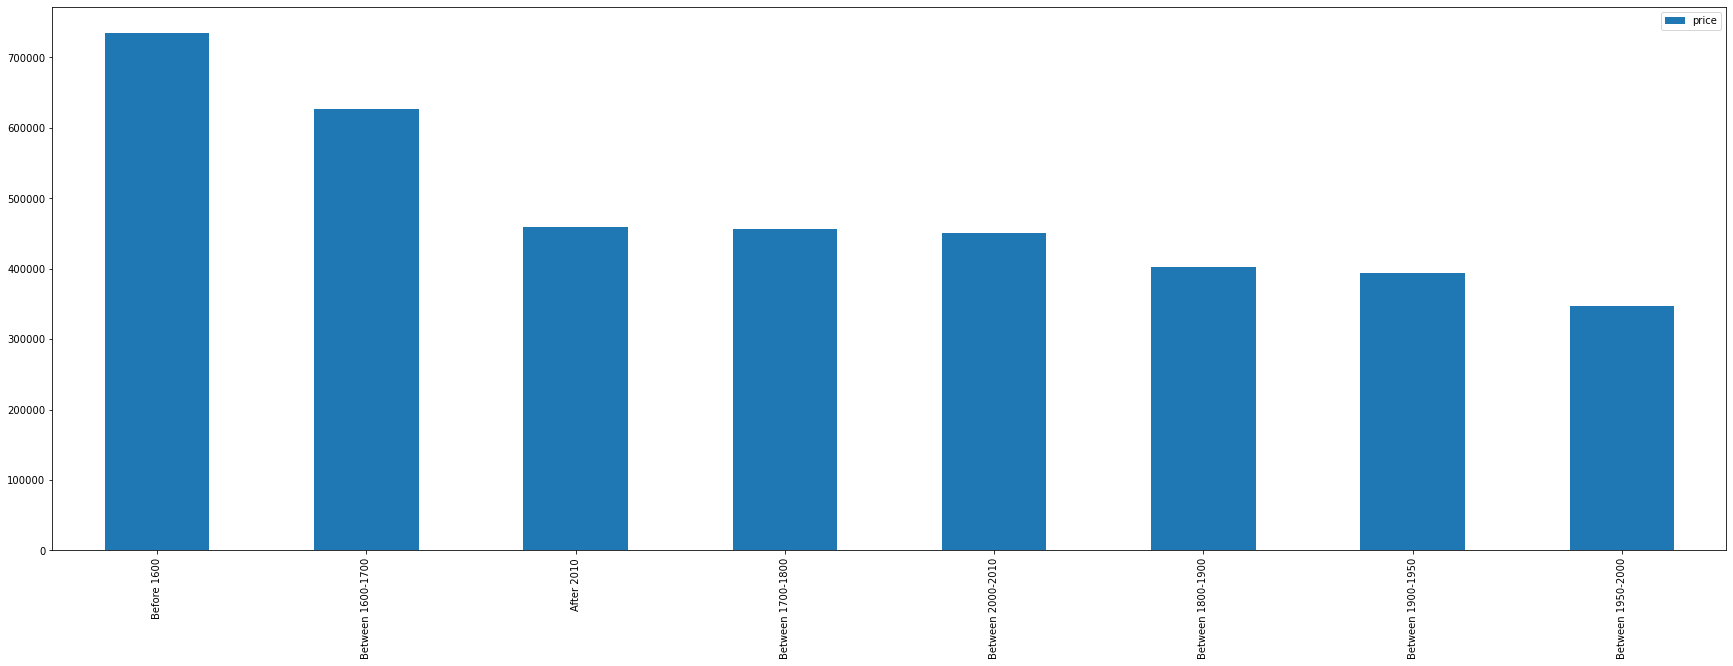

In [125]:
#Average houseprice per construction year
fundadf = funda_final.groupby(by="constructionyear_category").agg({'price':'mean'}).reset_index().sort_values(by='price', ascending=False)
ax = fundadf.plot.bar(x='constructionyear_category', xlabel = '', figsize=(30,10))

Based on above plots, prices are higher for old constructed houses.

## Is there a difference in prices based on the type of house?

In [126]:
#Group the houses based on type
group_houses = funda_final.groupby(['housetype'])
#Count number of houses per type
counts = group_houses.size().to_frame(name = 'n').reset_index()
#Retrieve min, median and max for each variable per housetype
housetypes = counts.join(group_houses.agg(['min', 'median', 'max']))
#Retrieve the seven most common housetypes
top5_total_sample = housetypes.nlargest(10, 'n')

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [127]:
#Storing the seven most common housestypes
top10_1 = top5_total_sample['housetype'].iloc[0]
top10_2 = top5_total_sample['housetype'].iloc[1]
top10_3 = top5_total_sample['housetype'].iloc[2]
top10_4 = top5_total_sample['housetype'].iloc[3]
top10_5 = top5_total_sample['housetype'].iloc[4]
top10_6 = top5_total_sample['housetype'].iloc[5]
top10_7 = top5_total_sample['housetype'].iloc[6]
top10_8 = top5_total_sample['housetype'].iloc[7]


top_housetypes = [top10_1, top10_2, top10_3, top10_4, top10_5, top10_6,top10_7,top10_8]

#Filter for only top housetypes 
top7_all = funda_final[funda_final['housetype'].isin(top_housetypes)]

print("The 7 most common house types of our sample are:")
print("       ", top10_1)
print("       ", top10_2)
print("       ", top10_3)
print("       ", top10_4)
print("       ", top10_5)
print("       ", top10_6)
print("       ", top10_7)

The 7 most common house types of our sample are:
        Eengezinswoning
        Herenhuis
        Villa
        Bungalow
        Landhuis
        Woonboerderij
        Grachtenpand


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='housetype', ylabel='price'>

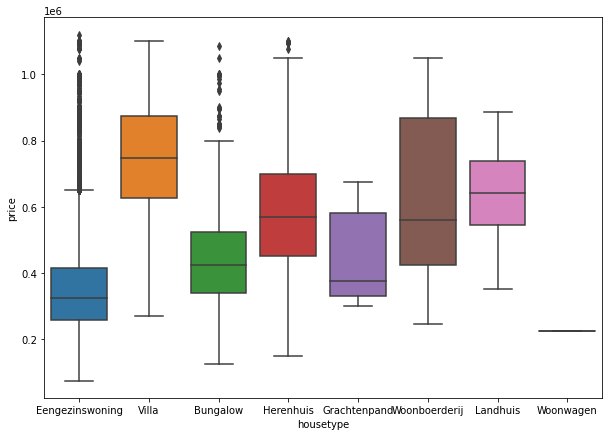

In [128]:
#Specifying Figure Layout
plt.figure(figsize = (10, 7))
sns.boxplot(data = top7_all, x = 'housetype', y = 'price')

 Based on the above subplot, price for villas is the highest followed by Landhuis and Herenhuis

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Spearman Correlation')

<AxesSubplot:>

Text(0.5, 1.0, 'Pearson Correlation')

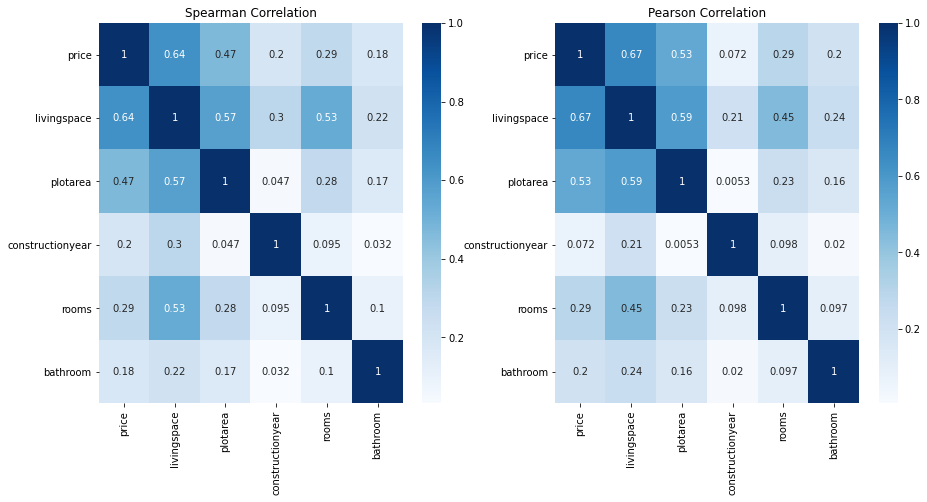

In [129]:
#EDA of the complete dataset
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
correlations = funda_final[['price', 'livingspace', 'plotarea', 'constructionyear', 'rooms', 'bathroom']]
corr_spear = sns.heatmap(correlations.corr(method = 'spearman'), cbar = True, annot = True, cmap = 'Blues')
corr_spear.set_title("Spearman Correlation")

plt.subplot(1, 2, 2)
corr_pear = sns.heatmap(correlations.corr(method = 'pearson'), cbar = True, annot = True, cmap = 'Blues')
corr_pear.set_title("Pearson Correlation")

Based on this plot, correlation between price and living space is the highest followed by the plotarea aka the bigger the living space is, the higher the price would be.

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'price')

Text(0, 0.5, 'Living Space')

<AxesSubplot:>

Text(0.5, 0, 'price')

Text(0, 0.5, 'Plot Area')

<AxesSubplot:>

(1800.0, 2020.0)

Text(0.5, 0, 'price')

Text(0, 0.5, 'Construction Year')

<AxesSubplot:>

Text(0.5, 0, 'price')

Text(0, 0.5, 'Number of Rooms')

<AxesSubplot:>

(1.0, 4.0)

Text(0.5, 0, 'price')

Text(0, 0.5, 'Number of Bathrooms')

Text(0.5, 0.98, '\n Impact of Numerical Variables on Days Till Sold')

<Figure size 2880x720 with 0 Axes>

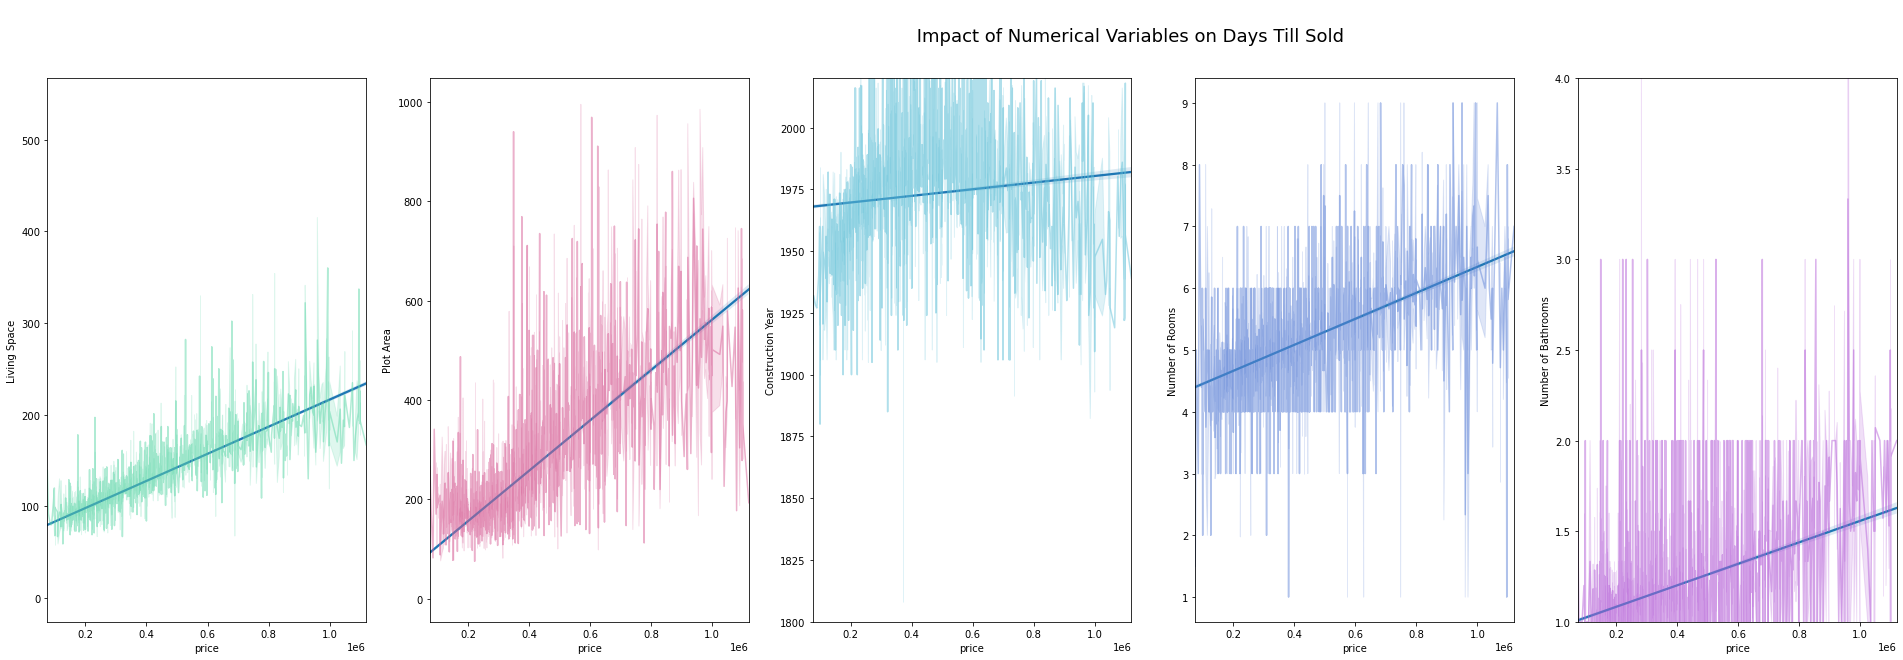

In [130]:
#Line & Regression Plot of all numerical Variables
plt.figure(figsize = (40, 10))
plt.figure(figsize = (40, 10))


plt.subplot(1, 6, 1)
plt2 = sns.regplot(x = 'price', y = 'livingspace', data = funda_final, fit_reg = True, scatter_kws = {'alpha':0.0})
plt2 = sns.lineplot(x = 'price', y = 'livingspace', data = funda_final, alpha = 0.5, color = '#62D8AB')
plt2.set_xlabel("price")
plt2.set_ylabel("Living Space")

plt.subplot(1, 6, 2)
plt3 = sns.regplot(x = 'price', y = 'plotarea', data = funda_final, fit_reg = True, scatter_kws = {'alpha':0.0})
plt3 = sns.lineplot(x = 'price', y = 'plotarea', data = funda_final, alpha = 0.5, color = '#D86298')
plt3.set_xlabel("price")
plt3.set_ylabel("Plot Area")

plt.subplot(1, 6, 3)
plt4 = sns.regplot(x = 'price', y = 'constructionyear', data = funda_final, fit_reg = True, scatter_kws = {'alpha':0.0})
plt4 = sns.lineplot(x = 'price', y = 'constructionyear', data = funda_final, alpha = 0.5, color = '#62C1D8')
plt4.set_ylim(1800, 2020)
plt4.set_xlabel("price")
plt4.set_ylabel("Construction Year")

plt.subplot(1, 6, 4)
plt5 = sns.regplot(x = 'price', y = 'rooms', data = funda_final, fit_reg = True, scatter_kws = {'alpha':0.0})
plt5 = sns.lineplot(x = 'price', y = 'rooms', data = funda_final, alpha = 0.5, color = '#6286D8')
plt5.set_xlabel("price")
plt5.set_ylabel("Number of Rooms")

plt.subplot(1, 6, 5)
plt6 = sns.regplot(x = 'price', y = 'bathroom', data = funda_final, fit_reg = True, scatter_kws = {'alpha':0.0})
plt6 = sns.lineplot(x = 'price', y = 'bathroom', data = funda_final, alpha = 0.5, color = '#B662D8')
plt6.set_ylim(1, 4)
plt6.set_xlabel("price")
plt6.set_ylabel("Number of Bathrooms")

plt.suptitle('\n Impact of Numerical Variables on Days Till Sold', fontsize = 18)

Based on these regression lines, it can be seen that number of rooms and plot area have more influence on price than other variables

# Topic Modelling

Finally, we seek to include the descriptions of the houses in our model as well. For this, we extract topics through Topic Modelling and Text Processing. We clean the description column and extract topics in the following section.

In [131]:
import spacy

In [132]:
model_data = funda_final

In [133]:
model_data['constructionyear_category'].unique()

array(['Between 1900-1950', 'Between 1950-2000', 'Between 2000-2010',
       'After 2010', 'Between 1800-1900', 'Between 1700-1800',
       'Between 1600-1700', 'Before 1600'], dtype=object)

In [134]:
# constants
USE_STORED_SVC_HYPERTUNED_MODELS = True
USE_STORED_SVC_SKLEARNED_HYPERTUNED_MODELS = True
USE_STORED_NN_HYPERTUNED_MODELS = True

In [135]:
funda_final.head()

,city,Provincienaam,title,price,postalcode,livingspace,plotarea,constructionyear,garden,energylabel,...,bathroom,description,offerdate,selldate,duration,broker,garden_bool,constructionyear_category,z_price,outliers
0,Aalsmeer,Noord-Holland,Oosteinderweg 373,335000,1432 AZ,116,195,1930,,E,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,11 oktober 2021,2 maanden,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.266072,0
1,Aalsmeer,Noord-Holland,Kamperfoeliestraat 62,395000,1431 RP,81,175,1995,Garden,C,...,1,Deze “kwadrant” woning heeft niet alleen een l...,02/Sep/21,24/Sep/21,3 weken,Makelaarskantoor Mantel BV,True,Between 1950-2000,0.017797,0
2,Aalsmeer,Noord-Holland,Oosteinderweg 371 a,355000,1432 AZ,134,183,1930,,G,...,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,09/Sep/21,4 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,0.183314,0
3,Aalsmeer,Noord-Holland,Oosteinderweg 177,750000,1432 AK,180,825,1930,,F,...,2,Aan de voorzijde ziet u niet hoe netjes en rui...,30 juli 2021,06/Sep/21,5 weken,Makelaarskantoor Mantel BV,False,Between 1900-1950,1.451160,0
4,Aalsmeer,Noord-Holland,Oosteinderweg 409,299000,1432 BH,81,132,1925,Garden,G,...,1,"Bieden vanaf € 299.000,- met een originele vra...",10/Sep/21,28 oktober 2021,6 weken,Goedhart Makelaars & Taxateurs,True,Between 1900-1950,0.415037,0


In [136]:
#Load the Dutch language model for Spacy
nlp = spacy.load('nl_core_news_md')

#Storing stopwords for cleaning description column
stopwords = list(STOP_WORDS)

In [137]:
#Cleaning Description Column

#Storing seperate dataset
m = funda_final

#Make everything lower case 
m['description'] = m['description'].str.lower()
#Remove Punctuation
m['description'] = m['description'].str.replace(r'[^\w\s]+', '')
#Storing cleaned Description and removing Numbers
m['clean_description'] = m['description'].str.replace('\d+', '')

<ipython-input-137-d6b611dfaee0>:9: FutureWarning: The default value of regex will change from True to False in a future version.
<ipython-input-137-d6b611dfaee0>:11: FutureWarning: The default value of regex will change from True to False in a future version.


In [138]:
#Lemmatizing the cleaned Descriptions
#lemmatized = []
#
#for x in m['clean_description']:
#    docx = nlp(x)
#    docr = str("output.csv".join([i.lemma_ for i in docx]))
#    lemmatized.append(docr)
#
##Making column for processed descriptions
#m['processed_description'] = lemmatized

In [139]:
#Tokenizing processed descriptions
m['tokens'] = m['clean_description'].apply(lambda x: [item for item in str(x).split() if item not in stopwords])
#Display original, cleaned and Tokens
m[['description', 'clean_description', 'tokens']].head(3)

,description,clean_description,tokens
0,let op wegens de grote belangstelling is het o...,let op wegens de grote belangstelling is het o...,"[let, grote, belangstelling, moment, helaas, b..."
1,deze kwadrant woning heeft niet alleen een leu...,deze kwadrant woning heeft niet alleen een leu...,"[kwadrant, woning, leuke, rustige, ligging, le..."
2,let op wegens de grote belangstelling is het o...,let op wegens de grote belangstelling is het o...,"[let, grote, belangstelling, moment, helaas, b..."


In [140]:
#Defining dummy Function
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_df = 0.7,
    min_df = 5,
    max_features=5000 # add the max_features argument
    )

#Establishing Frequency Matrix
frequency_matrix = count_vectorizer.fit_transform(m['tokens'])

#Transforming
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)

#Getting Model with 10 Components
model = NMF(n_components=10, init='nndsvd')

#Fitting the Model
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', n_components=10)

In [141]:
#Creating Function get_topics
def get_topics(model, n_top_words):
    '''This function takes a fitted NMF factorization model, and a n_top_words parameter.
    It then produces a dataframe where the columns are the topics that have been learned, and the
    rows are the top words that define the topic, ranked by their coefficients.
    '''

    feature_names = count_vectorizer.get_feature_names()
    d = {}
    for i in range(model.n_components):
        # model.components_ matrix contains the matrix H where topics are 
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [142]:
#Display Topics
get_topics(model, 20)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,ruimte,m,the,m²,koper,e,wanden,garage,x,meetinstructie
1,huis,ca,and,ca,koopovereenkomst,vv,plafond,oprit,ca,nen
2,via,circa,with,m³,verkoper,berging,stucwerk,bijkeuken,afm,verschillen
3,ligt,inhoud,a,inhoud,informatie,stenen,afgewerkt,royale,meter,meten
4,grote,woonoppervlakte,to,circa,dient,vaste,laminaatvloer,toegang,e,gebruiksoppervlakte
5,heerlijk,bouwjaar,floor,groot,onroerende,zonnige,toegang,vrijstaande,afmetingen,interpretatieverschillen
6,twee,perceel,house,woonoppervlakte,opgenomen,moderne,vloer,inpandige,afmeting,meting
7,tweede,woonoppervlak,on,bouwjaar,verkocht,achterom,achterzijde,autos,vv,eenduidige
8,wijk,oppervlakte,you,perceel,uitdrukkelijk,dakkapel,beschikt,biedt,laminaatvloer,bedoeld
9,fijne,perceeloppervlakte,room,perceeloppervlakte,koopsom,diverse,tegelvloer,privacy,alwaar,indicatie


In [143]:
#Store Topics and their score in dataframe
document_topics = model.transform(X=tf_idf_matrix)
document_topics = pd.DataFrame(document_topics)
main_topic = document_topics.idxmax(axis=1)
topics = ["Topic " + str(x) for x in range(1, 11)]
main_topic = main_topic.apply(lambda x: topics[x])

#Attaching Topics to m
m['main_topic'] = main_topic

In [144]:
#Storing scores seperately
scores = document_topics

#Joining the scores to the dataset
m_scores = pd.concat([m.reset_index(drop = True), scores.reset_index(drop = True)], axis=1)

#Renaming the scores into their topics
m_new = m_scores.rename(columns= { 0 : 'TopA', 1 : 'TopB', 2: 'TopC', 3 : 'TopD', 4 : 'TopE', 5 : 'TopF', 6 : 'TopG', 7: 'TopH', 8 : 'TopI', 9 : 'TopJ'})


In [145]:
#Changing last datatype
# Adding another column
#funda_final['bathroom'] = funda_final['bathroom'].astype(int)

## Feature selection

After exploring a sample of our dataset of 1,000 houses and realizing that the variables that have a big influence on price are living space and number of rooms , the entire dataset was utilized to understand the impact of different variables on the price of the house.
The variables that stood out in our sample as well as the entire dataset were type of a house such as villas were the most expensive followed by landhuis and construction year as well as houses that were built earlier were expensive than newly constructed houses.
We can see that plotarea influences price even more so than living space. We could also previously see in our sample data that having a garden also makes a house  slightly expensive, which would go in line with the stronger impact on plotarea (since plotarea also incorporates gardens).
We also see that, Based on the spearman and pearson's correlation, all the variables have a positive impact on the price. The highest correlation is between price and living space followed by plot area and number of rooms respectively.

Based on the means of different variables, it can be seen that the highest price for the houses, was in Noord Holland.We also include the scores of the topics that we received through topic modelling for our final prediction. 

Our features for our model are therefore the following:

- topics (TopA - TopJ)
- livingspace
- plotarea
- constructionyear
- number of rooms
- Garden

In [146]:
#Final Feature Selection

features = m_new[['TopA', 'TopB', 'TopC', 'TopD', 'TopE', 'TopF', 'TopG', 'TopH', 'TopI', 'TopJ', 'price', 'livingspace', 'plotarea', 'constructionyear', 'rooms', 'garden']]
features_for_classification = m_new[['TopA', 'TopB', 'TopC', 'TopD', 'TopE', 'TopF', 'TopG', 'TopH', 'TopI', 'TopJ', 'price', 'livingspace', 'plotarea', 'constructionyear', 'rooms', 'garden']]
print(features.head())

features.to_csv('C:/Users/shubh/OneDrive/Documents/funda dataset/features.csv', sep = ';')
features_for_classification.to_csv('C:/Users/shubh/OneDrive/Documents/funda dataset/features_for_classification.csv', sep = ';')


       TopA  TopB      TopC      TopD      TopE      TopF      TopG      TopH  \
0  0.009928   0.0  0.075949  0.031785  0.005657  0.000000  0.000000  0.005480   
1  0.024754   0.0  0.000000  0.030153  0.003572  0.030965  0.000000  0.000310   
2  0.009910   0.0  0.074436  0.032157  0.008242  0.000363  0.004300  0.003787   
3  0.006865   0.0  0.000000  0.037192  0.003193  0.005305  0.015473  0.052915   
4  0.025418   0.0  0.002326  0.021042  0.009128  0.013406  0.027962  0.008514   

   TopI     TopJ   price  livingspace  plotarea  constructionyear  rooms  \
0   0.0  0.00000  335000          116       195              1930      3   
1   0.0  0.00002  395000           81       175              1995      4   
2   0.0  0.00000  355000          134       183              1930      5   
3   0.0  0.00000  750000          180       825              1930      5   
4   0.0  0.00000  299000           81       132              1925      4   

   garden  
0          
1  Garden  
2          
3       

In [147]:
print(" . . . .  the end.")

 . . . .  the end.
